# plot rappel conso

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('rappelconso0.csv',sep=';')

In [5]:
df.head()

,﻿Référence Fiche,N° de Version,Nature juridique du rappel,Catégorie de produit,Sous-catégorie de produit,Nom de la marque du produit,Noms des modèles ou références,Identification des produits,Conditionnements,Date début/Fin de commercialisation,...,Modalités de compensation,Date de fin de la procédure de rappel,Informations complémentaires publiques,Liens vers les images,Lien vers la liste des produits,Lien vers la liste des distributeurs,Lien vers affichette PDF,Lien vers la fiche rappel,RappelGuid,Date de publication
0,2021-03-0001,1,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI",Bijouterie,LOU YETU,Bracelet RAFAELLA,Tous les lots,NaN,NaN,...,Remboursement,NaN,Le consommateur est invité à cesser immédiatem...,https://rappel.conso.gouv.fr/image/99952f76-9a...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/9/I...,https://rappel.conso.gouv.fr/fiche-rappel/9/In...,D8B0BE3C-007B-4B47-9E9D-B4C5878E60EA,2021-03-26
1,2021-03-0002,1,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI",Equipements de Protection Individuels,Careline Medisafe,Masques de protection KN95 (Référence : 65665),20200412,Boîte de 20 pièces,NaN,...,Remboursement,NaN,NaN,https://rappel.conso.gouv.fr/image/485617b7-ee...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/10/...,https://rappel.conso.gouv.fr/fiche-rappel/10/I...,9599A5D9-047A-4CBC-8776-4629DDB66952,2021-03-26
2,2021-03-0003,1,Volontaire (sans arrêté préfectoral),"Vêtements, Mode, EPI","Vêtements, textiles, accessoires de mode",Tajine Banane,sweat shirt Hoody Cantine gris Tajine Banane,Tous les lots,NaN,NaN,...,Echange,NaN,NaN,https://rappel.conso.gouv.fr/image/f0799218-f5...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/11/...,https://rappel.conso.gouv.fr/fiche-rappel/11/I...,DB9B00F9-C1E5-4085-939F-DB6ABACBF57F,2021-03-26
3,2021-03-0004,1,Volontaire (sans arrêté préfectoral),Alimentation,Céréales et produits de boulangerie,Système U,Bagels Sésame,L0237 Date limite de consommation 12/11/2020 ...,NaN,NaN,...,Remboursement,NaN,Les autorités sanitaires françaises ont été in...,https://rappel.conso.gouv.fr/image/937cc7be-cd...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/12/...,https://rappel.conso.gouv.fr/fiche-rappel/12/I...,F57D7BC2-1373-4000-B1C3-34028C8DBFAD,2021-03-26
4,2021-03-0005,1,Volontaire (sans arrêté préfectoral),Automobiles et moyens de déplacement,Tous types d'accessoires,Formula Baby,"Siège Auto Groupe 2/3 Formula Baby Select, mod...",Tous les lots,NaN,NaN,...,Remboursement,NaN,NaN,https://rappel.conso.gouv.fr/image/a2852c2f-9f...,NaN,NaN,https://rappel.conso.gouv.fr/affichettePDF/13/...,https://rappel.conso.gouv.fr/fiche-rappel/13/I...,5106DA04-3429-47F2-A83D-20AF2CFD8654,2021-03-26


In [41]:
group_by_marque_nature=df.groupby(['Nom de la marque du produit','Nature juridique du rappel']).size().reset_index(name='count')
group_by_marque_nature

,Nom de la marque du produit,Nature juridique du rappel,count
0,'Sans Marque',Volontaire (sans arrêté préfectoral),3
1,-,Volontaire (sans arrêté préfectoral),3
2,-ORFITO,Volontaire (sans arrêté préfectoral),1
3,.,Volontaire (sans arrêté préfectoral),3
4,/,Imposé par arrêté préfectoral,2
...,...,...,...
3376,"égouttés, demi-secs par 2",Imposé par arrêté préfectoral,1
3377,élaboré dans nos laboratoire,Volontaire (sans arrêté préfectoral),1
3378,ökoland,Imposé par arrêté préfectoral,6
3379,Œuf de tortue à faire éclore (Growing Egg Turtle),Volontaire (sans arrêté préfectoral),1


C:\Users\noebr\AppData\Local\Temp\ipykernel_22660\3955591358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = group_by_marque_nature.pivot( 'Nature juridique du rappel','Nom de la marque du produit', 'count')


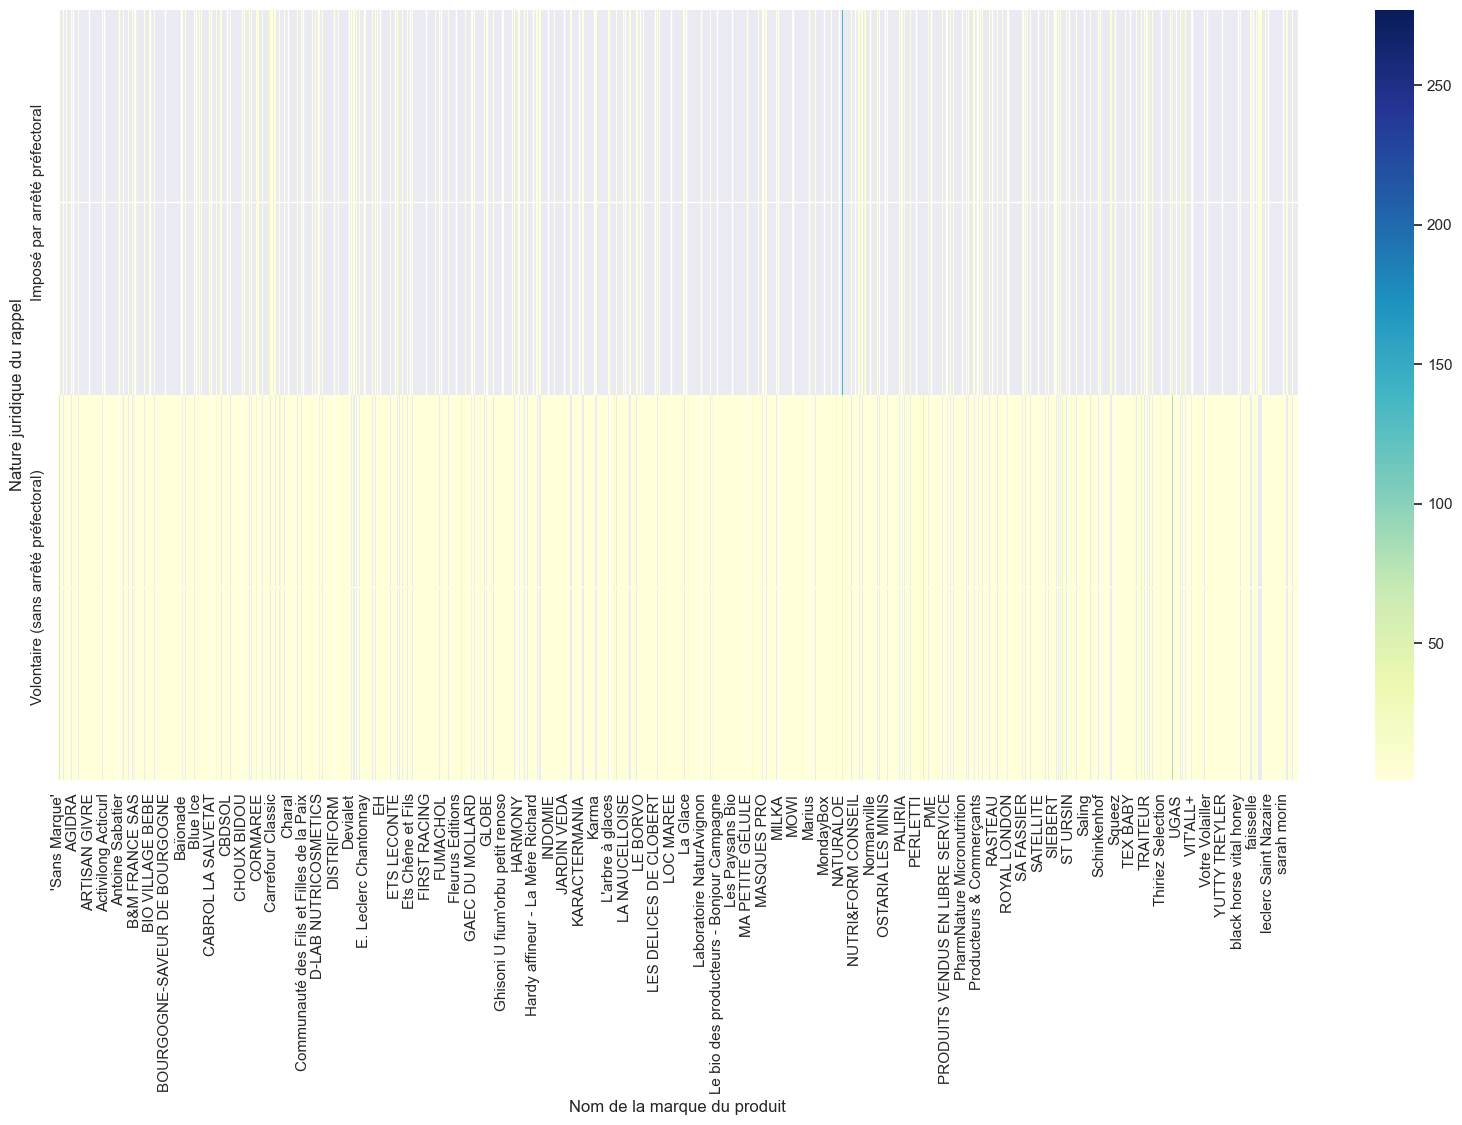

In [42]:
pivot_df = group_by_marque_nature.pivot( 'Nature juridique du rappel','Nom de la marque du produit', 'count')

sns.heatmap(pivot_df, annot=False, cmap='YlGnBu')
sns.set(rc={'figure.figsize':(20,10)})


C:\Users\noebr\AppData\Local\Temp\ipykernel_22660\21015535.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = group_by_categorie.pivot( 'Sous-catégorie de produit','Catégorie de produit', 'count')


<Axes: xlabel='Catégorie de produit', ylabel='Sous-catégorie de produit'>

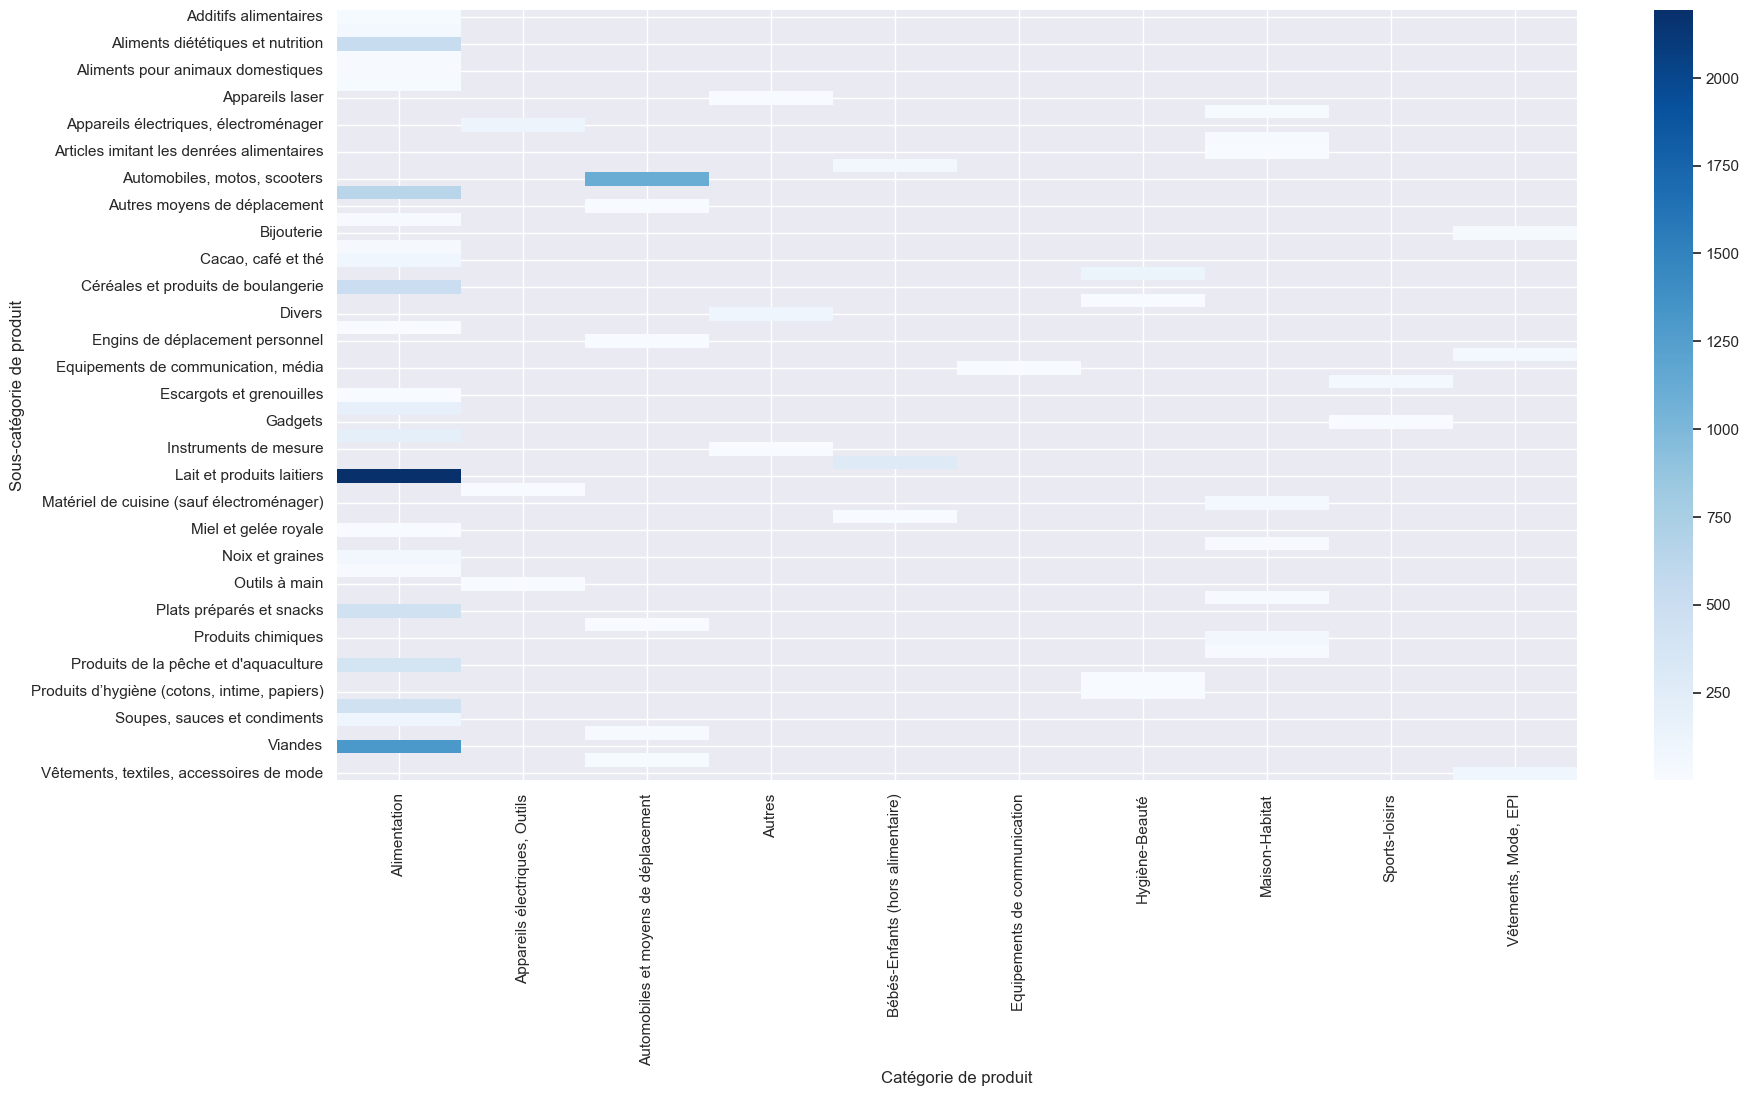

In [64]:
group_by_categorie=df.groupby(['Catégorie de produit','Sous-catégorie de produit']).size().reset_index(name='count')
group_by_categorie.dropna()
pivot_df = group_by_categorie.pivot( 'Sous-catégorie de produit','Catégorie de produit', 'count')

sns.heatmap(pivot_df, annot=False, cmap="Blues")


C:\Users\noebr\AppData\Local\Temp\ipykernel_22660\251147519.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = group_by_categorie.pivot( 'Nature juridique du rappel','Nom de la marque du produit', 'count')


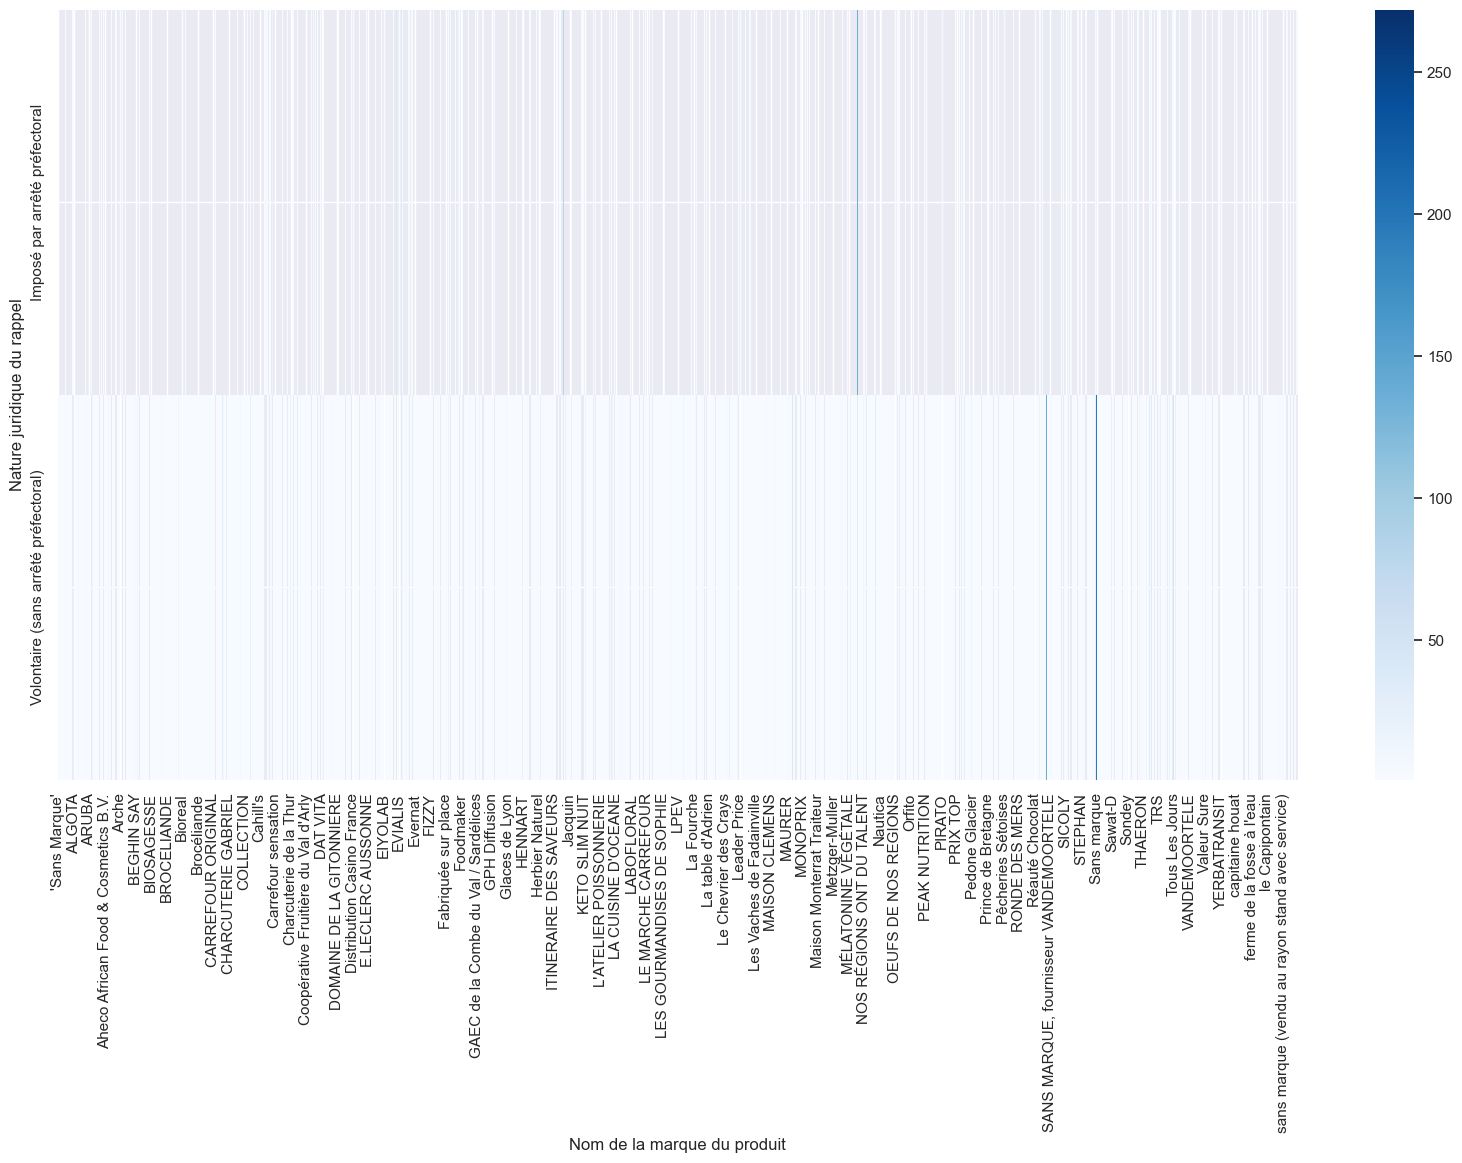

In [59]:
group_by_categorie=df[df['Catégorie de produit']=='Alimentation'].groupby(['Nom de la marque du produit','Nature juridique du rappel']).size().reset_index(name='count')

pivot_df = group_by_categorie.pivot( 'Nature juridique du rappel','Nom de la marque du produit', 'count')

sns.heatmap(pivot_df, annot=False, cmap="Blues")
sns.set(rc={'figure.figsize':(20,10)})


In [ ]:
group_by_categorie=df[df['Catégorie de produit']=='Alimentation'].groupby(['Nom de la marque du produit','Nature juridique du rappel']).size().reset_index(name='count')

pivot_df = group_by_categorie.pivot( 'Nature juridique du rappel','Nom de la marque du produit', 'count')

sns.heatmap(pivot_df, annot=False, cmap="Blues")
sns.set(rc={'figure.figsize':(20,10)})

In [60]:
group_by_categorie

,Nom de la marque du produit,Nature juridique du rappel,count
0,'Sans Marque',Volontaire (sans arrêté préfectoral),3
1,-,Volontaire (sans arrêté préfectoral),3
2,-ORFITO,Volontaire (sans arrêté préfectoral),1
3,.,Volontaire (sans arrêté préfectoral),3
4,/,Imposé par arrêté préfectoral,1
...,...,...,...
2521,ÉLABORES DANS NOTRE RAYON PÂTISSERIE,Volontaire (sans arrêté préfectoral),1
2522,Élaborés dans nos ateliers.,Volontaire (sans arrêté préfectoral),1
2523,"égouttés, demi-secs par 2",Imposé par arrêté préfectoral,1
2524,élaboré dans nos laboratoire,Volontaire (sans arrêté préfectoral),1


In [99]:
def heatMapByCount(dataf,columns1,columns2,cmapColor):
    group_by_categorie=dataf.groupby([columns1,columns2]).size().reset_index(name='count')
    pivot_df = group_by_categorie.pivot(columns2,columns1,'count')
    sns.set(rc={'figure.figsize':(20,10)})
    return sns.heatmap(pivot_df, annot=False, cmap=cmapColor)


C:\Users\noebr\AppData\Local\Temp\ipykernel_22660\1800503948.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = group_by_categorie.pivot(columns2,columns1,'count')
) missing from current font.\site-packages\seaborn\utils.py:80: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: xlabel='Informations complémentaires publiques', ylabel='Sous-catégorie de produit'>

) missing from current font.ng\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.ng\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


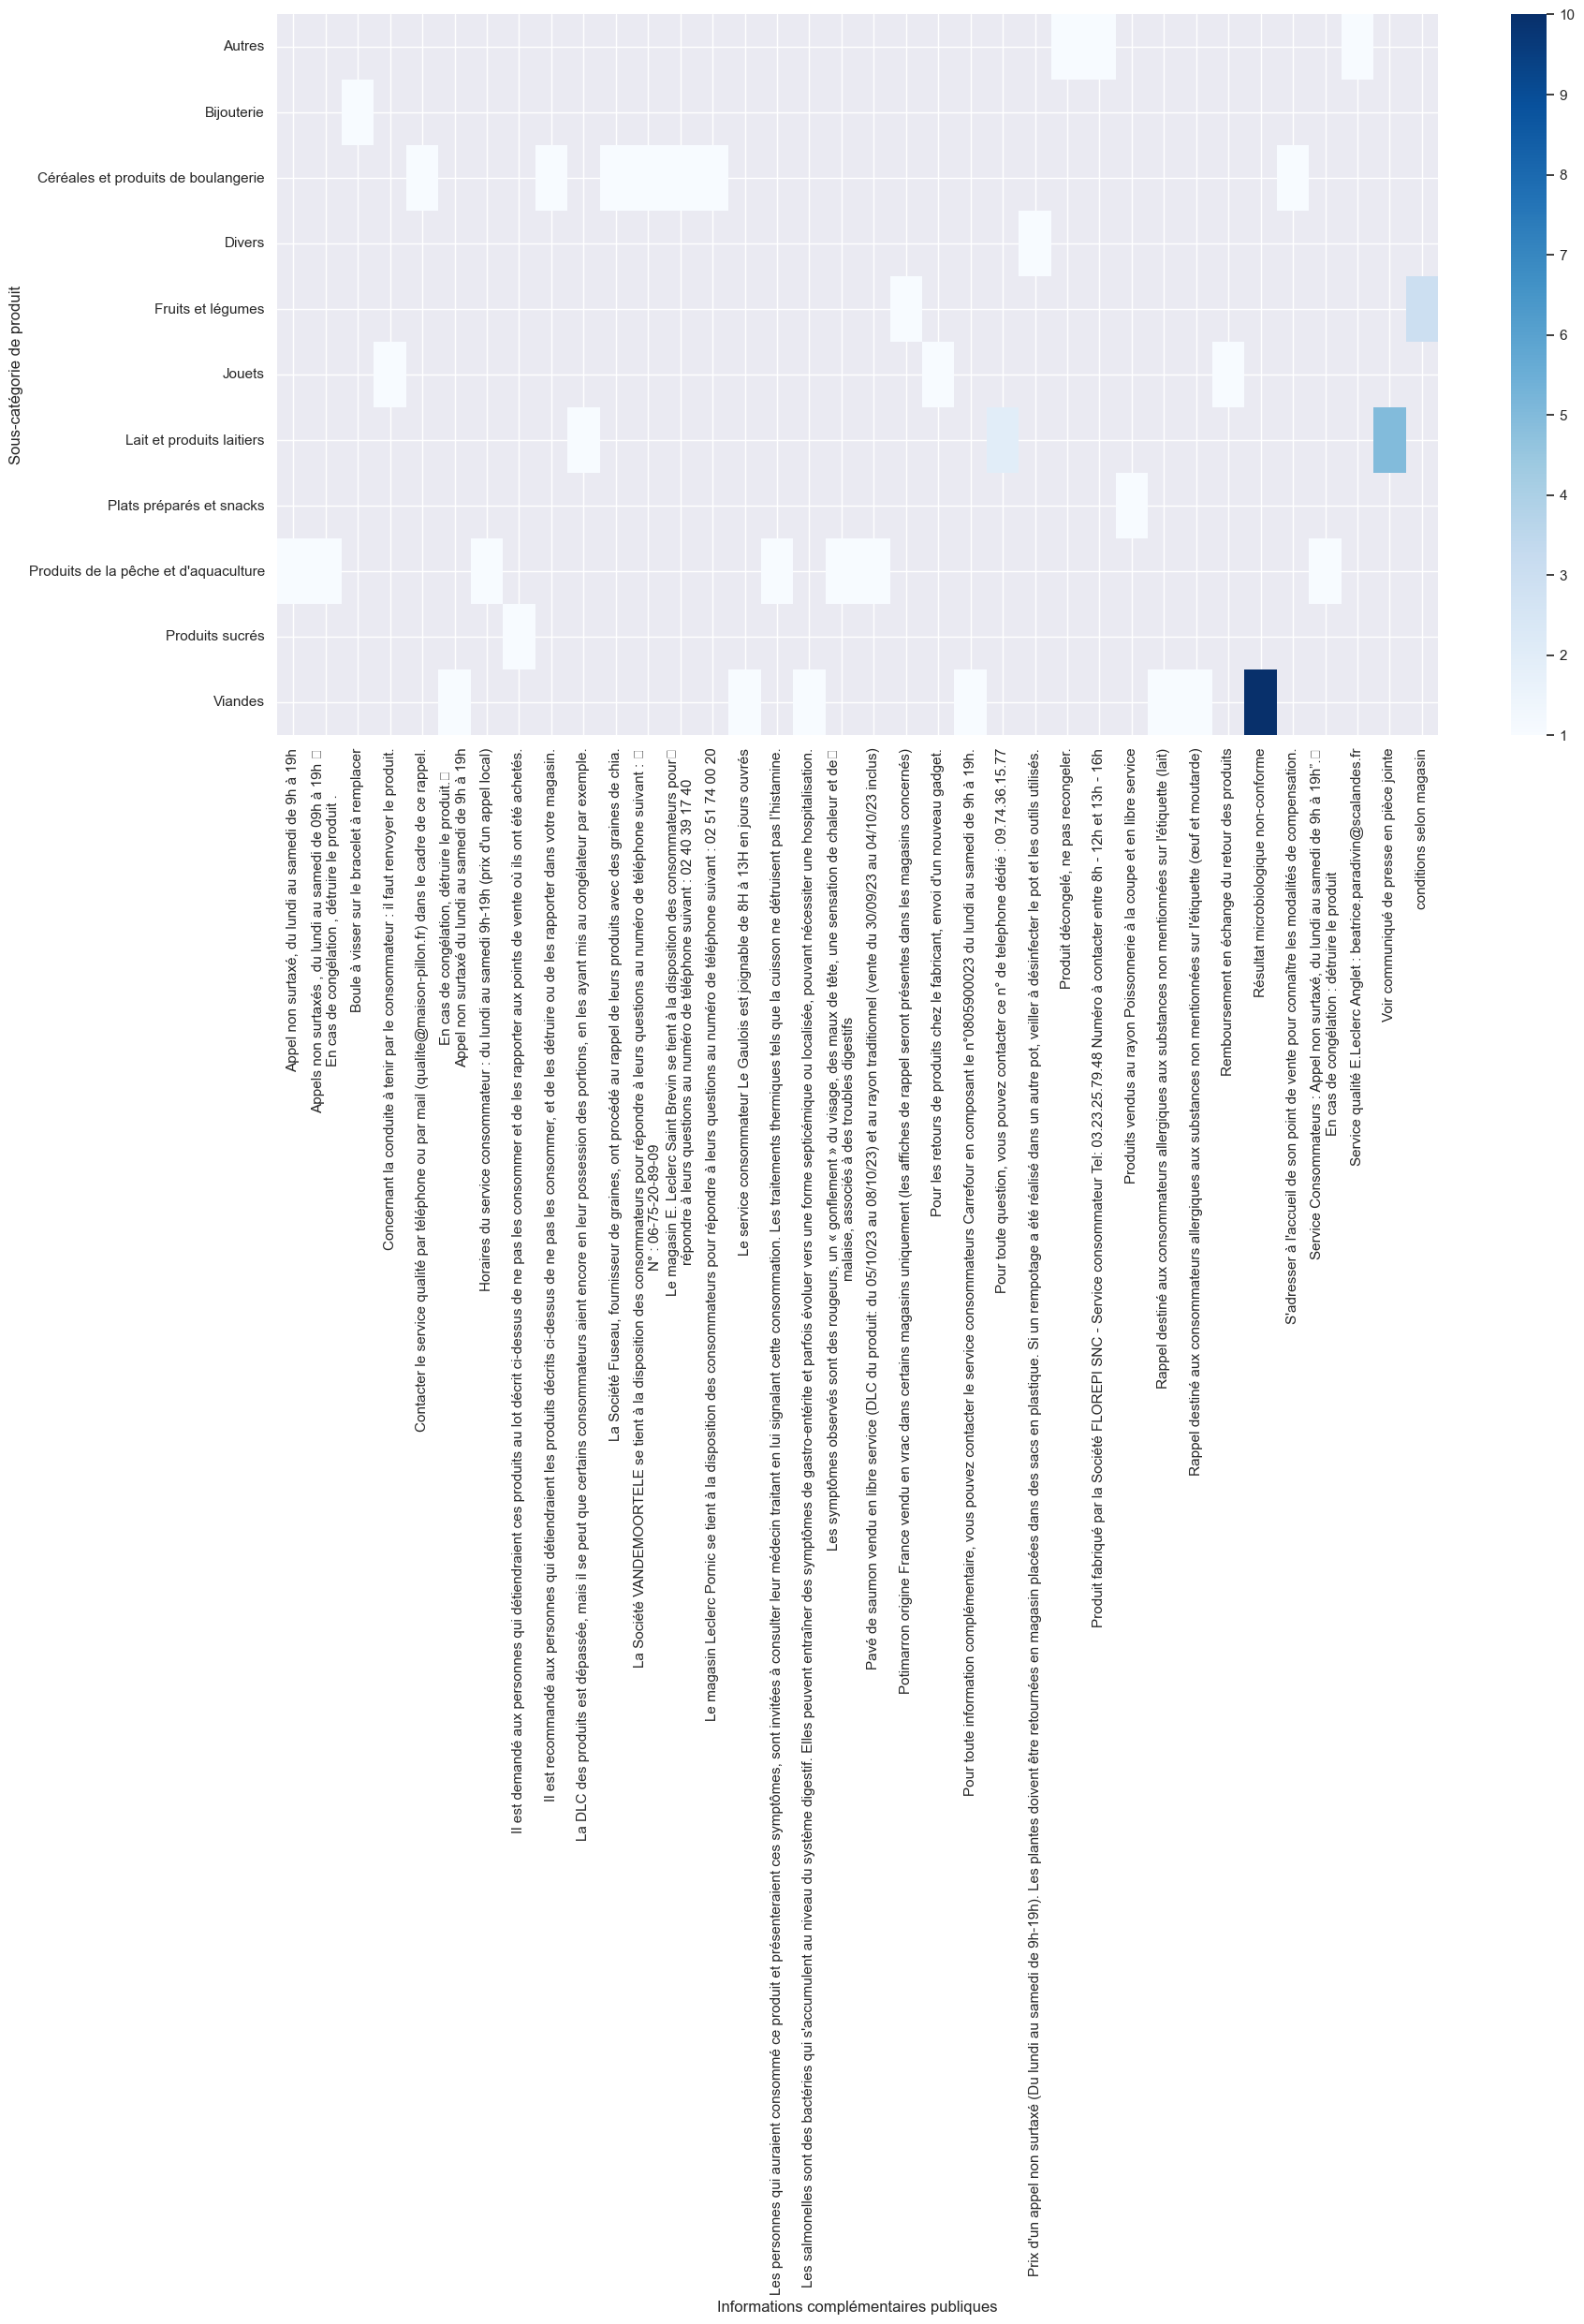

In [100]:
heatMapByCount(df[df['Nom de la marque du produit']=='Sans marque'],'Informations complémentaires publiques','Sous-catégorie de produit','Blues')